In [84]:
# Importing libraries
import numpy as np
import pandas as pd 
import csv
import requests 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Twitter's credentials to get the additional data
consumer_key = '###############################'
consumer_secret = '############################'
access_token = '#########################'
access_secret = '##################'

In [3]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [4]:
api = tweepy.API(auth, wait_on_rate_limit=True)

### Gathering

##### We need to import three datasets, one given, one using requests, one from API

In [5]:
TSV_URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

file_download = requests.get(TSV_URL) # Getting the content
open('image_predictions.csv', 'wb').write(file_download.content) # Writing the content 

335079

In [6]:
image_predictions = pd.read_csv('image_predictions.csv', sep='\t') # Importing the neural network's data into a DF
main_df = pd.read_csv('twitter-archive-enhanced.csv') # Importing the main data into another DF

In [7]:
tweet_ids = main_df.tweet_id.values
len(tweet_ids)

2356

In [13]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
1838: 676089483918516224
Success
1839: 675898130735476737
Success
1840: 675891555769696257
Success
1841: 675888385639251968
Success
1842: 675878199931371520
Success
1843: 675870721063669760
Success
1844: 675853064436391936
Success
1845: 675849018447167488
Success
1846: 675845657354215424
Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 6757073302

In [8]:
# Given that the txt file has one json file per line, we read line by line and append to a list of json files
with open('tweet_json.txt') as json_file:
    object_list = []
    for line in json_file.readlines():
        object_list.append(json.loads(line))

In [9]:
object_list[0] # Inspecting one element to see if it's correctly outputted

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [10]:
ids = [] # Creating empty lists for the info we want to get out of each json object
retweet_count = []
favorite_count = []

for item in object_list: # Looping through the objects and adding the required info to the lists
    ids.append(item['id'])
    retweet_count.append(item['retweet_count'])
    favorite_count.append(item['favorite_count'])

In [11]:
tweets_api_df = pd.DataFrame(columns=['id','retweet_count','favorite_count']) # Creating an empty dataframe with our intended columns

In [12]:
tweets_api_df # As expected

,id,retweet_count,favorite_count


In [13]:
tweets_api_df['id'] = ids # Adding the lists to a separate dataframe
tweets_api_df['retweet_count'] = retweet_count
tweets_api_df['favorite_count'] = favorite_count

#### We have all the dataframes now. We need to start inspecting the data: assess, clean then test

In [14]:
pd.set_option('display.max_colwidth', -1)

In [15]:
main_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [16]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
tweets_api_df.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,7609,35894
1,892177421306343426,5637,30963
2,891815181378084864,3730,23301
3,891689557279858688,7784,39174
4,891327558926688256,8383,37427


In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Timestamp should be a datetime column. Lots of unecessary columns that can be dropped. Doggo, floofer, pupper and puppo can be done in one column

In [19]:
# Checking for retweets in the main dataframe
len(main_df[main_df.retweeted_status_id.isnull() == False])

181

In [20]:
# Checking for abnormal values in rating_denominator
main_df.rating_denominator.value_counts().sort_index()

0      1   
2      1   
7      1   
10     2333
11     3   
15     1   
16     1   
20     2   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

In [21]:
main_df[main_df.rating_denominator == 80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88,80,None,None,None,None,None


In [22]:
# Checking for abnormal values in rating_numerator
main_df.rating_numerator.value_counts().sort_index

<bound method Series.sort_index of 12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64>

In [23]:
main_df[main_df.rating_numerator == 50] # have to update this as well. Seems like the 50/50 values were picked up

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None


In [24]:
main_df[main_df.rating_numerator == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


##### Seems like instead of picking up the rating, the values in the ratings column picked a ratio from the text itself. Additionally seems like some of the integeres before the . were scrapped off so we got 75 as a value for numerator.

In [25]:
main_df.name.value_counts().sort_index(ascending = False) 
# Seems like there are issues with names of the dogs, have to explore further

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [26]:
main_df[main_df.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


##### Either missing values for the dogs names or incorrect values, such as "a".

In [27]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


##### Visually assesing the second dataframe, it seems that some of the predictions are not dog breeds but rather other names

In [28]:
image_predictions[image_predictions.p1 == 'shopping_cart']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,7.958960e-03,True
703,684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,shopping_cart,0.460950,False,chow,0.261288,True,Labrador_retriever,7.419380e-02,True
1432,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,shopping_cart,0.572349,False,Labrador_retriever,0.151406,True,shopping_basket,1.071020e-01,False
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False
1834,836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping_cart,0.572422,False,shopping_basket,0.414002,False,toy_poodle,5.887300e-03,True


# Quality issues:
## Main Dataframe:
* Many null values in columns such as in_reply_to_status, in_reply_to_user_id etc. - done
* Retweets thus invalid entries - done
* Abnormal, null or wrongly extracted values in the rating_numerator & rating_denominator column - done
* NaN or wrong inputs for the names columns - done
* Timestamp column should be datetime type - done

## Image predictions:
* Inconsistent letter cases (some are starting with Capital letter, some are not) - done


# Tidiness issues:
## Main Dataframe:
* Lots of unnecessary columns that can be dropped - done
* Doggo, floofer, pupper and puppo can be column values rather than column headers - done


## Image predictions:
* Joining the table with the main dataframe - done

## Tweets API Dataframe:
* Rename the id column to tweet_id column so we can join later - done
* Retweet counts and favorite counts should be added to the main Dataframe - done

# Clean

In [29]:
# Starting with copies of the dataframes so we can work with them more easily:
main_df_copy = main_df.copy()
image_predictions_copy = image_predictions.copy()
tweets_api_df_copy = tweets_api_df.copy()

### Define
#### Remove the retweets by removing the rows which have the retweet_status_id value not-null

### Code

In [30]:
main_df_copy = main_df_copy[main_df_copy.retweeted_status_id.isnull()]

### Test

In [31]:
main_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Define
#### Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

### Code

In [32]:
main_df_copy = main_df_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                                  'retweeted_status_timestamp'], axis=1)

### Test

In [33]:
main_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Define
#### Create a new column, breed_type that has the doggo, floofer, pupper or puppo as its values, extracted from the columns. Afterwards, drop the 4 columns. Change the new column type to category

### Code

In [34]:
main_df_copy['breed_type'] = main_df_copy.text.str.extract('(doggo | floofer | pupper | puppo)', expand=True) # Creating the column

In [35]:
main_df_copy['breed_type'] = main_df_copy['breed_type'].str.strip() # Stripping any whitespaces

In [36]:
main_df_copy = main_df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1) # Dropping the initial columns

In [37]:
main_df_copy['breed_type'] = main_df_copy['breed_type'].astype('category') # Changing to categorical

### Test

In [38]:
main_df_copy.breed_type.value_counts()

pupper     152
doggo      55 
puppo      30 
floofer    3  
Name: breed_type, dtype: int64

In [39]:
main_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   object  
 3   text                2175 non-null   object  
 4   expanded_urls       2117 non-null   object  
 5   rating_numerator    2175 non-null   int64   
 6   rating_denominator  2175 non-null   int64   
 7   name                2175 non-null   object  
 8   breed_type          240 non-null    category
dtypes: category(1), int64(3), object(5)
memory usage: 155.2+ KB


### Define
#### Do a join between main dataframe and the image prediction. After that, drop unecessarry columns (we'll only keep the first prediction). 

### Code

In [40]:
main_df_copy = main_df_copy.merge(image_predictions_copy, on = 'tweet_id', how = 'inner')

In [41]:
# Drop the unecessary columns
main_df_copy = main_df_copy.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'source'], axis = 1)

### Test

In [42]:
main_df_copy.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1994 non-null   int64   
 1   timestamp           1994 non-null   object  
 2   text                1994 non-null   object  
 3   expanded_urls       1994 non-null   object  
 4   rating_numerator    1994 non-null   int64   
 5   rating_denominator  1994 non-null   int64   
 6   name                1994 non-null   object  
 7   breed_type          216 non-null    category
 8   jpg_url             1994 non-null   object  
 9   p1                  1994 non-null   object  
 10  p1_conf             1994 non-null   float64 
 11  p1_dog              1994 non-null   bool    
dtypes: bool(1), category(1), float64(1), int64(3), object(6)
memory usage: 175.4+ KB


### Define
#### Rename the tweets api dataframe ID column to tweet id

### Code

In [43]:
tweets_api_df_copy = tweets_api_df_copy.rename({'id' : 'tweet_id'}, axis = 'columns')

### Test

In [44]:
tweets_api_df_copy.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7609,35894
1,892177421306343426,5637,30963
2,891815181378084864,3730,23301
3,891689557279858688,7784,39174
4,891327558926688256,8383,37427


### Define
#### Join the tweets dataframe with the maindataframe to add the favorites & retweets counts

### Code

In [45]:
main_df_copy = pd.merge(main_df_copy, tweets_api_df_copy, on = 'tweet_id', how = 'left')

### Test

In [46]:
main_df_copy.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1994 non-null   int64   
 1   timestamp           1994 non-null   object  
 2   text                1994 non-null   object  
 3   expanded_urls       1994 non-null   object  
 4   rating_numerator    1994 non-null   int64   
 5   rating_denominator  1994 non-null   int64   
 6   name                1994 non-null   object  
 7   breed_type          216 non-null    category
 8   jpg_url             1994 non-null   object  
 9   p1                  1994 non-null   object  
 10  p1_conf             1994 non-null   float64 
 11  p1_dog              1994 non-null   bool    
 12  retweet_count       1987 non-null   float64 
 13  favorite_count      1987 non-null   float64 
dtypes: bool(1), category(1), float64(3), int64(3), object(6)
memory usage: 206.6+ KB


### Define
#### Change the datatype of the timestamp column to datetime

### Code

In [47]:
main_df_copy.timestamp = pd.to_datetime(main_df_copy.timestamp)

### Test

In [48]:
main_df_copy.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   expanded_urls       1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   breed_type          216 non-null    category           
 8   jpg_url             1994 non-null   object             
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   bool               
 12  retweet_count       1987 non-null 

### Define
#### Capitalize the first letter of the p1 column

### Code

In [49]:
main_df_copy.p1 = main_df_copy.p1.str.title()

### Test

In [50]:
main_df_copy.head(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,7609.0,35894.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,5637.0,30963.0
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,3730.0,23301.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_Towel,0.170278,False,7784.0,39174.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,8383.0,37427.0


### Define
#### Replace incorrect dog names -> replace lower capital values with None, then replacing 'None' values with NaN

### Code

In [51]:
main_df_copy['name'][main_df_copy['name'].str.match('[a-z]+')] = 'None'
main_df_copy.name = main_df_copy.name.replace('None', np.nan)

### Test

In [52]:
main_df_copy[main_df_copy.name == 'None']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count


### Define
#### Replace the wrongly extracted values in the rating_numerator column. There are cases where the numbers before the decimal was scrapped off. Also there is a case where 50/50 were extracted rather than the number

### Code

In [53]:
# Using regex, we can extract the values where we have a decimal followed by a forward slash (/)
values = main_df_copy.loc[main_df_copy.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')
main_df_copy.loc[main_df_copy.text.str.contains('(\d+\.\d+\/)'), 'rating_numerator'] = values[0]

In [54]:
main_df_copy.loc[main_df_copy.rating_numerator == 50]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
925,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_Husky,0.396495,True,205.0,2340.0


In [55]:
main_df_copy.loc[main_df_copy.index == 925, 'rating_numerator'] = 11
main_df_copy.loc[main_df_copy.index == 925, 'rating_denominator'] = 10

### Test

In [57]:
main_df_copy.loc[main_df_copy.text.str.contains('(\d+\.\d+\/)')]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
39,883482846933004288,2017-07-08 00:28:19+00:00,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,Golden_Retriever,0.943082,True,8913.0,42617.0
503,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,True,6178.0,18401.0
553,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,NaN,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,Clumber,0.946718,True,1617.0,6579.0
1374,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,Kuvasz,0.438627,True,478.0,1694.0


In [58]:
main_df_copy.loc[main_df_copy.index == 925]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
925,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_Husky,0.396495,True,205.0,2340.0


### Saving the cleaner dataframes

In [59]:
main_df_clean = main_df_copy.copy()
tweets_api_df_clean = tweets_api_df_copy.copy()
image_predictions_clean = image_predictions_copy.copy()

In [60]:
main_df_clean.to_csv('twitter_archive_master.csv', index = False) # As per instructions
image_predictions_clean.to_csv('image_predictions_clean.csv', index = False)
tweets_api_df_clean.to_csv('tweets_api_df_clean.csv', index = False)

# Analysis and Visualisation

In [63]:
df = main_df_clean.copy() # Storing in a generic df for easier access

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   expanded_urls       1994 non-null   object             
 4   rating_numerator    1994 non-null   object             
 5   rating_denominator  1994 non-null   int64              
 6   name                1350 non-null   object             
 7   breed_type          216 non-null    category           
 8   jpg_url             1994 non-null   object             
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   bool               
 12  retweet_count       1987 non-null 

### Most common dog names

In [96]:
dog_names = df.name.value_counts()[1:11]

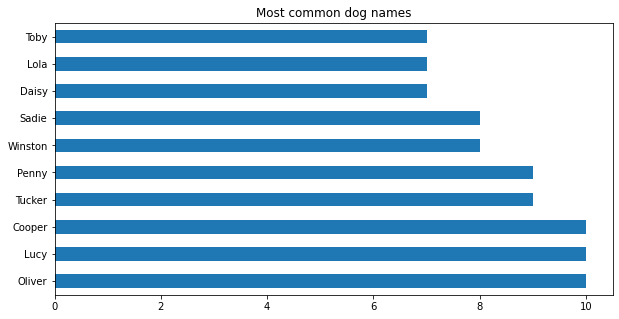

In [97]:
dog_names.plot.barh(figsize = (10,5), title = 'Most common dog names');

### Let's see the distribution of ratings (rating numerator)

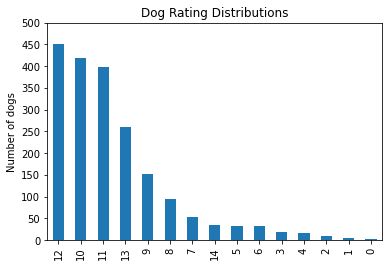

In [131]:
rating_plot = df.rating_numerator.value_counts()[0:15].plot(kind='bar', title = 'Dog Rating Distributions')
rating_plot.set_ylabel('Number of dogs')
rating_plot.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]);

### Let's get now the mean number of retweets and favorites per each correctly predicted dog breed

In [102]:
predicted_yes = df[df.p1_dog == True]

In [105]:
predicted_yes.p1.value_counts() # Seems like the most correctly predicted breed type was Golden Retriever

Golden_Retriever      139
Labrador_Retriever    95 
Pembroke              88 
Chihuahua             79 
Pug                   54 
                      .. 
Silky_Terrier         1  
Groenendael           1  
Scotch_Terrier        1  
Entlebucher           1  
Japanese_Spaniel      1  
Name: p1, Length: 111, dtype: int64

In [106]:
mean_values = predicted_yes.groupby('p1')['retweet_count','favorite_count'].mean()

In [112]:
top_10_by_retweet = mean_values.sort_values(by = 'retweet_count', ascending = False)[0:10]
top_10_by_favorite = mean_values.sort_values(by = 'favorite_count', ascending = False)[0:10]

In [113]:
top_10_by_retweet, top_10_by_favorite

(                       retweet_count  favorite_count
 p1                                                  
 Standard_Poodle        5814.285714    14433.142857  
 English_Springer       5233.444444    14269.888889  
 Afghan_Hound           5159.333333    15637.333333  
 Eskimo_Dog             4770.944444    13439.222222  
 Saluki                 4462.000000    22042.000000  
 French_Bulldog         4238.640000    17341.600000  
 Great_Pyrenees         4075.571429    11639.785714  
 Flat-Coated_Retriever  3996.625000    15364.750000  
 Lakeland_Terrier       3981.312500    12446.875000  
 Cardigan               3932.294118    13872.882353  ,
                          retweet_count  favorite_count
 p1                                                    
 Saluki                   4462.000000    22042.000000  
 French_Bulldog           4238.640000    17341.600000  
 Afghan_Hound             5159.333333    15637.333333  
 Black-And-Tan_Coonhound  3592.000000    15532.500000  
 Flat-Coated_Re

### Not many differences between the two. Only three breeds from the second list are not in the first (quite expected)
* Black-And-Tan_Coonhound
* Irish_Water_Spaniel
* Leonberg


### Lastly, let's look at the mean retweets and favorites per the dog_category (out of the 4)

In [134]:
breed_by_favorite = df.groupby(['breed_type'])['favorite_count'].mean().sort_values(ascending = False)
breed_by_retweet = df.groupby(['breed_type'])['retweet_count'].mean().sort_values(ascending = False)

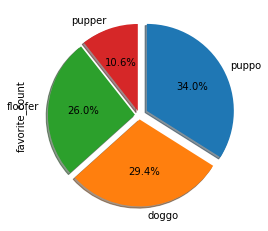

In [154]:
breed_by_favorite.plot(kind='pie', shadow = True, startangle = 90, explode = (0.1, 0.05, 0.05, 0.05), counterclock = False, autopct ='%.1f%%');

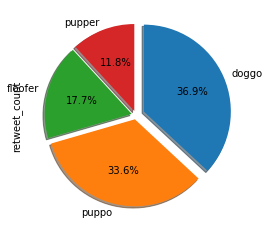

In [155]:
breed_by_retweet.plot(kind='pie', shadow = True, startangle = 90, explode = (0.1, 0.05, 0.05, 0.05), counterclock = False, autopct ='%.1f%%');

### Not many differences between the two, but expected. They should be fairly correlated